# Classification of Refactoring Types

Import the required packages for extracting and pre-processing of data

In [19]:
# Downloading the multi-label related packages
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN
from skmultilearn.problem_transform import ClassifierChain, BinaryRelevance, LabelPowerset
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
print(type(BinaryRelevance))

<class 'type'>


In [22]:
# read the data from the input Message.csv file
df_message = pd.read_csv('/content/Message.csv')

In [23]:
df_message.head()

,Commit message,Class
0,extract method.,extract
1,Minor tweaks following review extraction of me...,extract
2,extract some stuff to a method[git p4: depot p...,extract
3,extract some methods in DoiServiceImpl,extract
4,refactoring getMenuSpace in Navigation: extrac...,extract


In [24]:
df_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5004 entries, 0 to 5003
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Commit message  5004 non-null   object
 1   Class           5004 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [25]:
df_message.Class.unique()

array(['extract', 'move', 'inline', 'pull up', 'push down', 'rename'],
      dtype=object)

Need to remove duplicate entries with the same label.



In [26]:
df_message[df_message["Commit message"] == "* Added ErrorReportFrame for easier generic report. * Major changes in ROI classes (WARNING):    ROI class has more methods.    better 3D  4D and 5D ROI support.    better BooleanMask integration in ROI.    many others changes related to ROI and BooleanMask in general. * Base kernel ROI are now plugins. * Point3D / Point4D / Point5D classes improvements. * Rectangle3D / Rectangle4D / Rectangle5D classes improvements. * Colormap tabs are now colored to reflect the channel colormap. * Prelemenary Bio Formats automatic error report. * Added many color conversion methods and tools in ColorUtil class. * Added Overlay.isAttached(Sequence) method. * Added ByteArrayConvert.read/writeXXX() methods (handy to serialization). * Rewrote SequenceChooser class (cleaner and updated to new method). * Removed the useless ROI tooltips. * Severals fixes and tweaks. * Some refactoring."]

,Commit message,Class
2703,* Added ErrorReportFrame for easier generic re...,pull up
3515,* Added ErrorReportFrame for easier generic re...,push down


In [27]:
# Example of duplicate records
df_message.iloc[[125,126,127,128,129]]

,Commit message,Class
125,Coded MDI functionality and lots of other GUI ...,extract
126,Coded MDI functionality and lots of other GUI ...,extract
127,Coded MDI functionality and lots of other GUI ...,extract
128,Coded MDI functionality and lots of other GUI ...,extract
129,Coded MDI functionality and lots of other GUI ...,extract


In [28]:
# Removing duplicate records
df_message = df_message.drop_duplicates()

In [29]:
df_message[df_message["Commit message"] == "Coded MDI functionality and lots of other GUI code.GMLTextArea* Leading spaces are converted to tabs* Tab width is set on initialisation* Added getTextCompat() to convert newlines and tabs back for resave* See Prefs.tabWidth* See Util.convertIndents(String)GmMenu* Extracted from GmMenuBar to allow subclassingGmMenuBar* Added Window menuGmTreeGraphics* Background nodes are now shown correctly in the treeMDIManager* Implemented resizeDesktop()MDIMenu* The Window menu it updates when frames are added and removed and offers some common commands* Subclasses GmMenuMDIPane* Modified to call resizeDesktop() in certain cases* Added functions to close all etc.VTextIcon* Fixed a generics warningLGM* mdi is now an instance of MDIPane* Modified createTree to add a JToggleButton for the EventFrame* Reordered some GUI initialisation code to work with the extra toolbar button* Overloaded makeButton for other kinds of AbstractButtonResource* Modified the arguments to copy there are now two versions* Modified subclasses to use the new arguments.ResourceFrame* Added javadoc comments to some fields to clarify their purpose* Modified resourceChanged in all subclasses to compare against resOriginalScriptFrame* Modified to use GMLTextArea.getTextCompat()EventFrame* Added support for the toggle buttoncheckstyle.xml* TODO comments are now ignored Eclipse already has better functionality for thatAbstractBitmap* Removed a FIXME commentgit svn id: https://lateralgm.svn.sourceforge.net/svnroot/lateralgm@113 8f422083 7f27 0410 bc82 93e204be8cd2"]

,Commit message,Class
125,Coded MDI functionality and lots of other GUI ...,extract


In [30]:
df_message[df_message["Commit message"] == "* Added ErrorReportFrame for easier generic report. * Major changes in ROI classes (WARNING):    ROI class has more methods.    better 3D  4D and 5D ROI support.    better BooleanMask integration in ROI.    many others changes related to ROI and BooleanMask in general. * Base kernel ROI are now plugins. * Point3D / Point4D / Point5D classes improvements. * Rectangle3D / Rectangle4D / Rectangle5D classes improvements. * Colormap tabs are now colored to reflect the channel colormap. * Prelemenary Bio Formats automatic error report. * Added many color conversion methods and tools in ColorUtil class. * Added Overlay.isAttached(Sequence) method. * Added ByteArrayConvert.read/writeXXX() methods (handy to serialization). * Rewrote SequenceChooser class (cleaner and updated to new method). * Removed the useless ROI tooltips. * Severals fixes and tweaks. * Some refactoring."]

,Commit message,Class
2703,* Added ErrorReportFrame for easier generic re...,pull up
3515,* Added ErrorReportFrame for easier generic re...,push down


Prep for multi-label

In [31]:
df = pd.DataFrame(columns = ["Commit message", "extract", "move", "inline", "pull up", "push down", "rename"])

In [32]:
# Function Definition to convert the data frame from multi-class to multi-label
def convert_df(initial_df, new_df):
  """
    Function Definition to tokenize the input records.

    @param column: intial multi-class dataframe
    @type column: DataFrame

    @param column: intial multi-label dataframe
    @type column: DataFrame

    @return: list of tokens
  """
  for row in initial_df.values:
    if row[0] not in new_df['Commit message'].values:
      new_df = new_df.append({'Commit message': row[0]},ignore_index=True)
    new_df.loc[new_df['Commit message'] == row[0], row[1]] = 1
            
  return new_df

In [33]:
# Function call for dataframe convertion
new_df = convert_df(df_message, df)
new_df.head()

,Commit message,extract,move,inline,pull up,push down,rename
0,extract method.,1,NaN,NaN,NaN,NaN,NaN
1,Minor tweaks following review extraction of me...,1,NaN,NaN,NaN,NaN,NaN
2,extract some stuff to a method[git p4: depot p...,1,NaN,NaN,NaN,NaN,NaN
3,extract some methods in DoiServiceImpl,1,NaN,NaN,NaN,NaN,NaN
4,refactoring getMenuSpace in Navigation: extrac...,1,NaN,NaN,NaN,NaN,NaN


In [34]:
new_df[new_df["Commit message"] == "* Added ErrorReportFrame for easier generic report. * Major changes in ROI classes (WARNING):    ROI class has more methods.    better 3D  4D and 5D ROI support.    better BooleanMask integration in ROI.    many others changes related to ROI and BooleanMask in general. * Base kernel ROI are now plugins. * Point3D / Point4D / Point5D classes improvements. * Rectangle3D / Rectangle4D / Rectangle5D classes improvements. * Colormap tabs are now colored to reflect the channel colormap. * Prelemenary Bio Formats automatic error report. * Added many color conversion methods and tools in ColorUtil class. * Added Overlay.isAttached(Sequence) method. * Added ByteArrayConvert.read/writeXXX() methods (handy to serialization). * Rewrote SequenceChooser class (cleaner and updated to new method). * Removed the useless ROI tooltips. * Severals fixes and tweaks. * Some refactoring."]

,Commit message,extract,move,inline,pull up,push down,rename
2559,* Added ErrorReportFrame for easier generic re...,NaN,NaN,NaN,1,1,NaN


In [35]:
df = new_df.fillna(0)

In [36]:
# An Example of a multi-label commit message and its corresponding labels
df[df["Commit message"] == "* Added ErrorReportFrame for easier generic report. * Major changes in ROI classes (WARNING):    ROI class has more methods.    better 3D  4D and 5D ROI support.    better BooleanMask integration in ROI.    many others changes related to ROI and BooleanMask in general. * Base kernel ROI are now plugins. * Point3D / Point4D / Point5D classes improvements. * Rectangle3D / Rectangle4D / Rectangle5D classes improvements. * Colormap tabs are now colored to reflect the channel colormap. * Prelemenary Bio Formats automatic error report. * Added many color conversion methods and tools in ColorUtil class. * Added Overlay.isAttached(Sequence) method. * Added ByteArrayConvert.read/writeXXX() methods (handy to serialization). * Rewrote SequenceChooser class (cleaner and updated to new method). * Removed the useless ROI tooltips. * Severals fixes and tweaks. * Some refactoring."]

,Commit message,extract,move,inline,pull up,push down,rename
2559,* Added ErrorReportFrame for easier generic re...,0,0,0,1,1,0


# Pre-Processing

Convert the case of the Commit Message to lower case.

In [37]:
df['Commit message'] = df['Commit message'].str.lower()

Adding the most predicted works across all classifications to remove the noise.

In [38]:
stpwrd = nltk.corpus.stopwords.words('english')

In [39]:
# new_stopwords = ["method", "methods", "add", "added", "https", "class", "test"]

In [40]:
# stpwrd.extend(new_stopwords)

Tokenize each word in a sentence using NLTK after the stop word removal. 

In [41]:
# Function Definition to tokenize each records in the specific column.
def tokenize(column):
  """
    Function Definition to tokenize the input records.

    @param column: Record to be tokenized.
    @type column: Series

    @return: list of tokens
  """
  word_tokens = word_tokenize(column)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stpwrd]
  final_sentence = [w for w in filtered_sentence if w.isalpha()]
  return  final_sentence 

In [42]:
# Function Call for tokenization
df['Commit message'] = df.apply(lambda x: tokenize(x['Commit message']), axis=1)
df[['Commit message']].head()

,Commit message
0,"[extract, method]"
1,"[minor, tweaks, following, review, extraction,..."
2,"[extract, stuff, method, git, depot, paths, ch..."
3,"[extract, methods, doiserviceimpl]"
4,"[refactoring, getmenuspace, navigation, extrac..."


In [43]:
df['Commit message'].iloc[9]

['extract',
 'setup',
 'default',
 'httpparams',
 'public',
 'static',
 'methodgit',
 'svn',
 'id',
 'https']

Perform lemmatization on the tokenized data

In [44]:
# Function Definition to lemmatize the input record.
def lemmatize(row):
  """
    Function Definition to lemmatize each records in the specific column.

    @param row: The record to be lemmatized.
    @type row: list

    @return: List of lemmatized tokens
  """
  lemmatizer = WordNetLemmatizer()
  final_sentence = [lemmatizer.lemmatize(w) for w in row]
  return final_sentence

In [45]:
# Function Call for lemmatization
df['Commit message'] = df.apply(lambda x: lemmatize(x['Commit message']), axis=1)
df[['Commit message']].head()

,Commit message
0,"[extract, method]"
1,"[minor, tweak, following, review, extraction, ..."
2,"[extract, stuff, method, git, depot, path, cha..."
3,"[extract, method, doiserviceimpl]"
4,"[refactoring, getmenuspace, navigation, extrac..."


In [46]:
df["Commit message"] = [ " ".join(w) for w in df["Commit message"]]
df["Commit message"]

0                                          extract method
1       minor tweak following review extraction method...
2              extract stuff method git depot path change
3                           extract method doiserviceimpl
4       refactoring getmenuspace navigation extract is...
                              ...                        
4648           rename getprotocol getmechanism testclient
4649          rename mapping method signed luke hutchison
4650    renaming refactor deserialization related code...
4651    renamed usage description match name used comm...
4652    renamed isoccupied point point hasroaduseron p...
Name: Commit message, Length: 4653, dtype: object

In [47]:
df['Commit message'].iloc[9]

'extract setup default httpparams public static methodgit svn id http'

Perform tf-idf vectorization on the cleaned, tokenized and lemmitized input after splitting the data into test and train

In [48]:
# Splitting the input and the output features 
X = df['Commit message']
y = df[["extract", "move", "inline", "pull up", "push down", "rename"]]

# Splitting the data set into 80% of training data and 20% testing data and applying tf-idf vectorizer.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
tfidf = TfidfVectorizer(ngram_range=(1,3), lowercase=False, norm = 'l2')
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

# Model Training

Classifiers

In [49]:
mnb = MultinomialNB()
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None)
logr = LogisticRegression(solver='liblinear', C=300, random_state=42)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2, random_state=42)
rfc = RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [50]:
models = [mnb, sgd, logr, gnb, dtc, rfc]

In [51]:
# Function Definition for model training and testing
def model(classifiers, estimator, X_train, y_train, X_test, y_test):
  """
    Function Definition to train different classification models within 3 different Estimators.

    @param Classifier: Models used the one defined in the pervious cell.
    @type Classifier: list of models

    @param estimator: 3 Different Estimators namely 
    @type estimator: type 

    @param X_train: The input features for Training data
    @type X_train: DataFrame

    @param y_train: The output features for Training data
    @type y_train: DataFrame

    @param X_test: The input features for Testing data
    @type X_test: DataFrame

    @param y_test: The output features for Testing data
    @type y_test: DataFrame

    @return: List of lemmatized tokens
  """
  for classifier in classifiers:
      es = estimator(classifier)
      es.fit(X_train, y_train)
      pred = es.predict(X_test)
      print(classifier)
      print("\nAccuracy :",accuracy_score(y_test, pred))
      print("Hamming loss ",hamming_loss(y_test,pred))
      precision = precision_score(y_test, pred, average='micro')
      recall = recall_score(y_test, pred, average='micro')
      f1 = f1_score(y_test, pred, average='micro')
      precision = precision_score(y_test, pred, average='macro')
      recall = recall_score(y_test, pred, average='macro')
      f1 = f1_score(y_test, pred, average='macro')

      print("\nClassification Report")
      print (classification_report(y_test, pred))


Binary Relevence Multi-Label Classification

In [52]:
# Function Call for all the models with Binary Relevance Estimator.
model(models, BinaryRelevance, X_train, y_train, X_test, y_test)

MultinomialNB()

Accuracy : 0.0322234156820623
Hamming loss  0.16809881847475833

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       184
           1       0.00      0.00      0.00       165
           2       0.00      0.00      0.00       143
           3       1.00      0.01      0.01       157
           4       0.00      0.00      0.00       156
           5       1.00      0.16      0.27       164

   micro avg       1.00      0.03      0.06       969
   macro avg       0.50      0.03      0.05       969
weighted avg       0.52      0.03      0.05       969
 samples avg       0.03      0.03      0.03       969

SGDClassifier(alpha=0.001, max_iter=6, random_state=42, tol=None)

Accuracy : 0.17400644468313642
Hamming loss  0.1460794844253491

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.10      0.18       184
           1       0.67      0.06   

Classifier Chain Multi-Label Classification

In [53]:
# Function Call for all the models with Classifier Chain Estimator.
model(models, ClassifierChain, X_train, y_train, X_test, y_test)

MultinomialNB()

Accuracy : 0.0322234156820623
Hamming loss  0.16809881847475833

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       184
           1       0.00      0.00      0.00       165
           2       0.00      0.00      0.00       143
           3       1.00      0.01      0.01       157
           4       0.00      0.00      0.00       156
           5       1.00      0.16      0.27       164

   micro avg       1.00      0.03      0.06       969
   macro avg       0.50      0.03      0.05       969
weighted avg       0.52      0.03      0.05       969
 samples avg       0.03      0.03      0.03       969

SGDClassifier(alpha=0.001, max_iter=6, random_state=42, tol=None)

Accuracy : 0.3372717508055854
Hamming loss  0.22126745435016112

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.10      0.18       184
           1       0.69      0.07   

Label Powerset Multi-Label Classification

In [54]:
# Function Call for all the models with Label Powerset Estimator.
model(models, LabelPowerset, X_train, y_train, X_test, y_test)

MultinomialNB()

Accuracy : 0.5520945220193341
Hamming loss  0.1485857500895095

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       184
           1       0.50      0.72      0.59       165
           2       0.47      0.44      0.45       143
           3       0.42      0.39      0.41       157
           4       0.44      0.30      0.36       156
           5       0.91      0.87      0.89       164

   micro avg       0.57      0.55      0.56       969
   macro avg       0.57      0.55      0.55       969
weighted avg       0.58      0.55      0.56       969
 samples avg       0.57      0.56      0.57       969

SGDClassifier(alpha=0.001, max_iter=6, random_state=42, tol=None)

Accuracy : 0.5907626208378088
Hamming loss  0.1364124597207304

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.61      0.67       184
           1       0.60      0.69     

The Log Reg is the best.

In [55]:
# Checking the performance of top performing Model - SGD in Label Powerset.
sgd = LabelPowerset(SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=6, tol=None))
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)

In [ ]:
# The metrics used are Accuracy and Hamming Loss
print("\nAccuracy :",accuracy_score(y_test, sgd_pred))
print("Hamming loss ",hamming_loss(y_test,sgd_pred))

Using our running example, lets check its prediction.

In [57]:
# Output for the prediction of the above particular example was checked.
check = df["Commit message"].iloc[2559]
check_vec = tfidf.transform([check])
prediction = sgd.predict(check_vec)
prediction.toarray()

array([[0, 0, 0, 1, 1, 0]])

Confusion Matrix

In [58]:
# Confusion matrix values for the multi-label dataset
data = multilabel_confusion_matrix(y_test, sgd_pred)

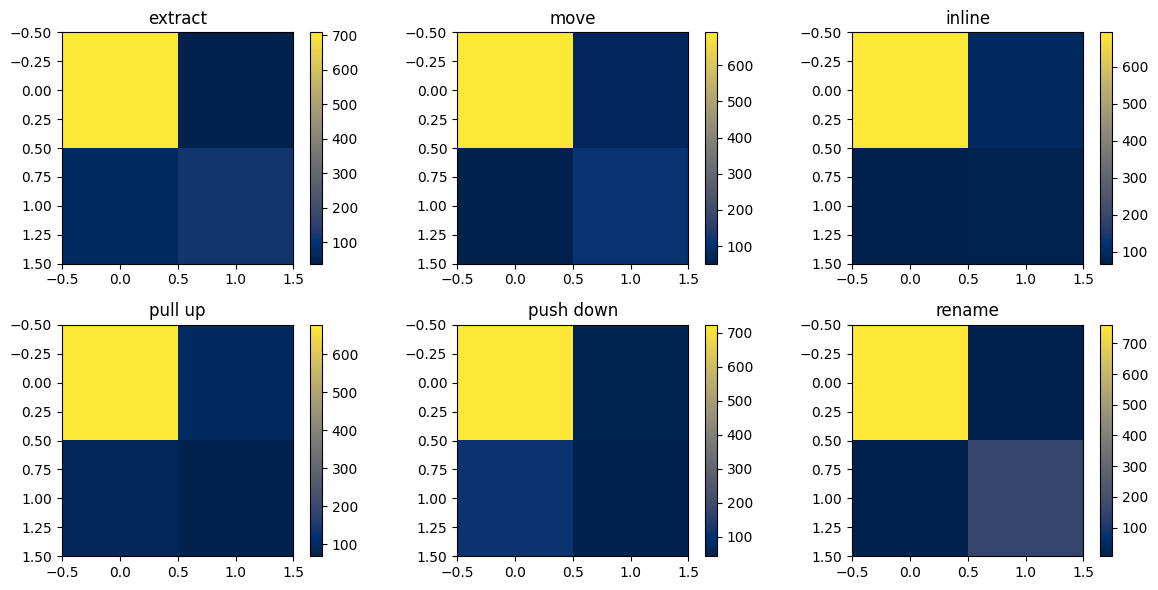

In [59]:
# Visual Plot of the Confusion matrix results from the above cell.
labels = ["extract","move","inline","pull up","push down","rename"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
# Plot the heatmaps for each label
for i, ax in enumerate(axs.flatten()):
    im = ax.imshow(data[i], cmap='cividis')
    ax.set_title(labels[i])
    fig.colorbar(im, ax=ax)
# Display the plot
plt.tight_layout()
plt.show()